### Problem Statement
A multinational retail company decides to embark on a campaign called 'Operation Increase Sales and Profit' (OISP) which focuses on increasing the sales of the company and maximising profit.

Before the management team of the company can take any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'. These data contains their four years daily sales records.

### Objectives
The project objectives are;

Analyse the data and advise management on what to do to increase sales and profit as intended in the campaign.

Ask the neccessary questions and provide answers based on the data.

Provide statistical summaries of the key variables considering the aim of the campaign to management.

### Solution Steps

**1. Library Importation** 

Imported the neccesary data wrangling libraries. 

**2. Exploratory Data Analysis(EDA) and Data Cleaning** 

At this stage, the data was explored using descriptive statistics and visualizations. The quality of the data was ensured by cleaning and removing columns missing more than 50% of the data and also creating new columns to aid the analysis.
Also, answered relevant questions that and find how why some anomalities are occuring in the data.

**3. Conclusion And Recommendations** 

Here, I provide a summary on my finding and advice the management on what can be done to improve sales and profit.

In [1]:
# importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#displaying all columns in the data set(No truncation when data is called by head())
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_columns', None)

# setting style and palette for seaborn plots
# sns.set_style('darkgrid')
# sns.set_palette('ocean')
# sns.set_context('notebook')

### EDA

In [2]:
# reading data

super_df= pd.read_csv('superstore data.csv',parse_dates =['Order Date','Ship Date'], encoding = 'latin1')
super_df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [3]:
# rows and columns of data

super_df.shape

(51290, 24)

In [4]:
# finding datatypes and non null values in each column

super_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [5]:
# finding number of null values in each column

super_df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [6]:
# Dropping Columns

print(f"number of columns before dropping {super_df.shape[1]}")
super_df.drop(["Row ID","Postal Code"],axis=1,inplace=True)
print(f"number of columns after dropping {super_df.shape[1]}")

number of columns before dropping 24
number of columns after dropping 22


In [7]:
# Printing out all columns in the data

for col in super_df.columns:
    print (col)

Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


In [8]:
# Extracting Year and Month columns from Order Date


super_df['Order_Month'] = super_df['Order Date'].dt.month_name() # Creating month name column
super_df['Order_Year']= super_df['Order Date'].dt.year # Creating year column

In [9]:
# Extracting Year,Month,Day columns from Ship Date

super_df['Ship_Month'] = super_df['Ship Date'].dt.month_name() # Creating month name column
super_df['Ship_Year'] = super_df['Ship Date'].dt.year  # Creating year column
super_df['Ship_Days'] = super_df['Ship Date'].dt.day_name() # Creating day name column

In [10]:
# checking for new columns created
super_df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Month,Order_Year,Ship_Month,Ship_Year,Ship_Days
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,January,2011,June,2011,Wednesday
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,January,2011,August,2011,Monday
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,January,2011,May,2011,Sunday
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,January,2011,May,2011,Sunday
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,January,2011,August,2011,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,December,2014,April,2015,Wednesday
51286,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,December,2014,May,2015,Friday
51287,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,December,2014,February,2015,Sunday
51288,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium,December,2014,June,2015,Monday


**From the above, It is noticed delivery varies from time to time regardless the ship mode. Delivery, that is ship date is usually months apart from the order dates**

In [11]:
# Statistical summary of numeric columns of the data

super_df.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost,Order_Year,Ship_Year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208,2012.792728
std,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931,1.105303
min,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,2015.000000


**OBSERVATIONS** 

The above contains the statistical description of all numerical columns in the dataset. 

Sales records a minimum of 0.44 and a max of 22638.48approx.  

Also, the min price of a product is 0.99 with max at 7546.16approx. 

Not to mention the company running at a loss with a minimum profit of -6599.99approx.


#### Finding the value counts of various columns 

In [12]:
super_df['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [14]:
super_df['Country'].value_counts()

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Eritrea             2
Chad                2
Swaziland           2
South Sudan         2
Bahrain             2
Name: Country, Length: 147, dtype: int64

In [15]:
super_df['Market'].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

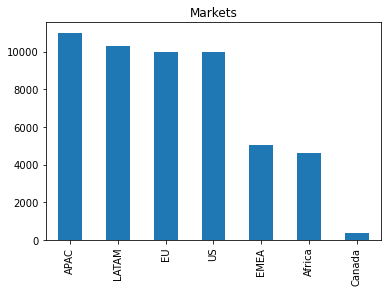

In [16]:
#visualizing value counts for Market

super_df['Market'].value_counts().plot(kind = 'bar', title = 'Markets');

In [17]:
super_df['Region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

**Observation**

The store is located in 7 markets, 13 regions and 147 countries.

In [13]:
super_df['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [18]:
super_df['Category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

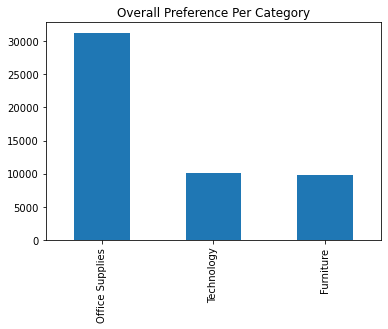

In [19]:
# visualising value counts for category
super_df['Category'].value_counts().plot(kind = 'bar',title = 'Overall Preference Per Category' );

**Observation**

The products sold by the store in the various countries are segmented as Consumer,Corporate, Home Office 
and further classified into Office Supplies, Technology and Furniture. 


In [20]:
super_df['Sub-Category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

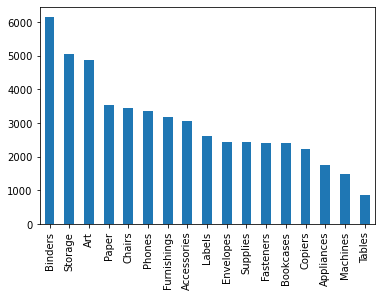

In [21]:
# visualising value counts for sub- category
super_df['Sub-Category'].value_counts().plot(kind = 'bar');

In [22]:
# Groupby function is used tp separate the data set to help in better analysing columns

aa = super_df.groupby(by = 'Sub-Category')[['Sales']].sum().round(2).sort_values('Sales',ascending =False)

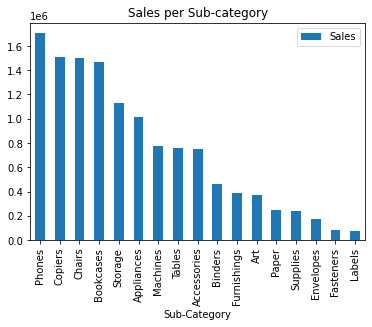

In [23]:
# visualising sum of sales per category
aa.plot(kind = 'bar', alpha = 1)
plt.title('Sales per Sub-category')
plt.show()

**Observation**

From the above visual, we observe that the sub category phones has the highest sales whereas labels has the least.

In [50]:
# Grouping sales by sub category and market
ab = super_df.groupby(['Sub-Category','Market'])[['Sales']].sum().round(2).sort_values('Sales',ascending =False)
ab


,,Sales
Sub-Category,Market,
Chairs,APAC,512974.20
Bookcases,APAC,504823.08
Copiers,APAC,494593.68
Phones,APAC,486354.50
Copiers,EU,365128.61
...,...,...
Tables,Canada,849.36
Furnishings,Canada,808.53
Envelopes,Canada,567.18


In [25]:
super_df['Order Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [27]:
super_df['Order_Month'].value_counts()

November     5660
December     5534
September    5237
June         4892
August       4715
October      4467
May          3938
March        3728
July         3571
April        3499
January      3122
February     2927
Name: Order_Month, dtype: int64

In [28]:
super_df['Ship_Month'].value_counts()

November     5593
December     5535
September    5277
June         4808
August       4735
October      4315
May          3890
July         3817
March        3508
April        3483
January      3295
February     3034
Name: Ship_Month, dtype: int64

In [29]:
super_df['Ship_Days'].value_counts()

Monday       7833
Saturday     7828
Sunday       7737
Tuesday      7401
Wednesday    7240
Friday       6904
Thursday     6347
Name: Ship_Days, dtype: int64

### Sales and Profit per market

In [51]:
# Creating a new sales column for unit price without discount

super_df['Unit_Price']= super_df['Sales'] /(super_df['Quantity'] * (1 - super_df['Discount']))

In [52]:
#Creating a new column for discounted amount

super_df['Discounted_Amt'] = super_df['Discount'] * (super_df['Unit_Price'] * super_df['Quantity']) 

In [53]:
# Sales per market
ss = super_df.groupby(by = 'Market')[['Sales']].sum().round(2)
ss

,Sales
Market,
APAC,3585744.13
Africa,783773.21
Canada,66928.17
EMEA,806161.31
EU,2938089.06
LATAM,2164605.17
US,2297200.86


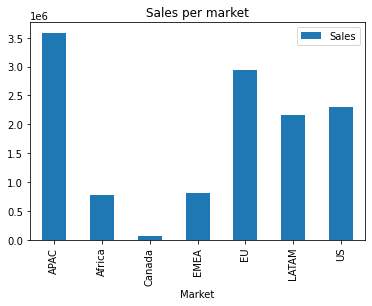

In [33]:
# plotting total sales per maket
ss.plot(kind = 'bar', alpha = 1)
plt.title('Sales per market')
plt.show()

**Observation** 

The market with the highest sales is APAC with Canada recording the least sales

In [34]:
# Profit per market
sp = super_df.groupby('Market')[['Profit']].sum().round(2)
sp

,Profit
Market,
APAC,436000.05
Africa,88871.63
Canada,17817.39
EMEA,43897.97
EU,372829.74
LATAM,221643.49
US,286397.02


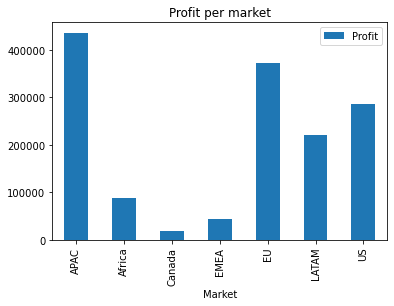

In [35]:
# plotting total sales per market
sp.plot(kind = 'bar')
plt.title('Profit per market')
plt.show()

**Observation**

From the graphs and figures above, the APAC market  recorded the most sales and profit. 

###  Most profitable market

In [36]:
so = sp.sort_values('Profit', ascending = False)[['Profit']]

**Most profitable market is the APAC market**

### Least profitable market

In [37]:
sp.sort_values( by = 'Profit', ascending = True)[['Profit']]

,Profit
Market,
Canada,17817.39
EMEA,43897.97
Africa,88871.63
LATAM,221643.49
US,286397.02
EU,372829.74
APAC,436000.05


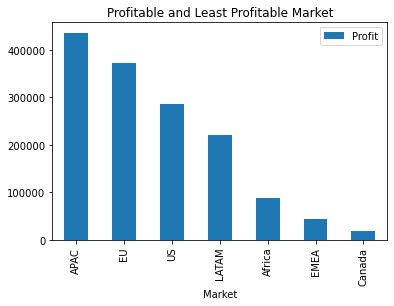

In [38]:
so.plot(kind = 'bar')
plt.title('Profitable and Least Profitable Market')
plt.show()

**Canada is the least profitable market**

### Month with most sales

In [39]:
super_df['Order_Month'].value_counts()

November     5660
December     5534
September    5237
June         4892
August       4715
October      4467
May          3938
March        3728
July         3571
April        3499
January      3122
February     2927
Name: Order_Month, dtype: int64

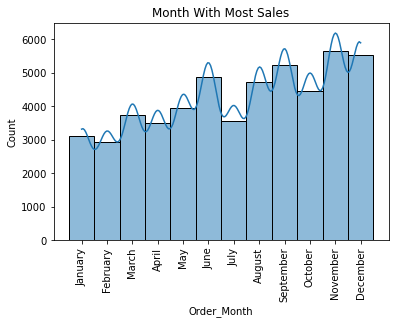

In [55]:
# visualising the month with the most sales
# kde =  True is to help determine distribution of observations in the data per it density
sns.histplot(super_df['Order_Month'],kde = True)
plt.xticks(rotation=90)
plt.xlabel('Order_Month')
plt.ylabel('Count')
plt.title('Month With Most Sales')
plt.show()

**The month with the most sales is November**

### Segment providing more profit

In [41]:
super_df['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [42]:
# Grouping segments per profit
sg = super_df.groupby(by = 'Segment')[['Profit']].sum().round(2)
sg

,Profit
Segment,
Consumer,749239.78
Corporate,441208.33
Home Office,277009.18


In [43]:
sg.index

Index(['Consumer', 'Corporate', 'Home Office'], dtype='object', name='Segment')

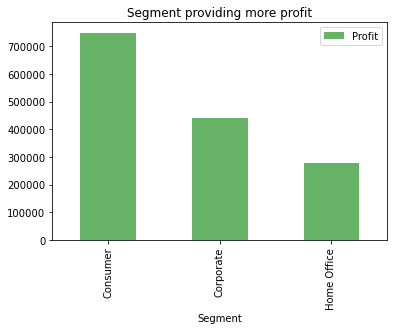

In [56]:
# Plotting profits of each segments
sg.plot(kind = 'bar',color = 'g', alpha = 0.6)

plt.title('Segment providing more profit')
plt.show()

**Observations**

The segment accruing most profit than any of the segment is Consumer.  
They record the highest profit because products in this segment are used daily. 
Sales in Home office can be improved by introducing a cross selling feature where customers are given suggestions on 
complementary items they could purchase along side what ever they are purchasing.


### Order priority yielding more sales

In [58]:
# unique variables in the column of order priority
super_df['Order Priority'].unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

In [59]:
# value count of order priority
super_df['Order Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [60]:
# grouping order priority by sales
# just checking if this will correspond with that of value_counts

op =super_df.groupby('Order Priority')[['Sales']].sum().round(2).sort_values('Sales',ascending = False)
op

,Sales
Order Priority,
Medium,7280892.37
High,3807548.14
Critical,986235.46
Low,567825.93


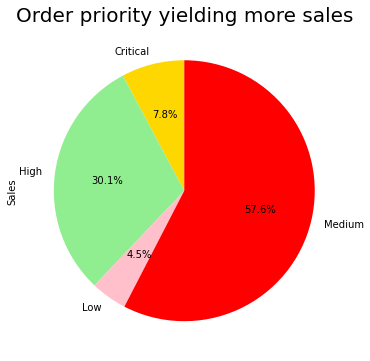

In [61]:
# visualising using pie plot for order priority

fig,ax = plt.subplots(figsize=(8,6))

colors_list=['gold','lightgreen','pink','red','cyan']

explode_list= [0.1,0,0,0,0]

super_df.groupby('Order Priority')['Sales'].sum().plot(kind = 'pie',
                                            autopct = '%1.1f%%',
                                            colors = colors_list,
                                            startangle = 90)

plt.title('Order priority yielding more sales',fontsize = 20)
plt.show()

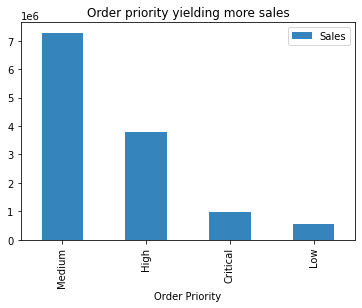

In [63]:
# plotting an alternate bar plot to display order priority

op.plot(kind = 'bar', alpha = 0.9)
plt.title('Order priority yielding more sales')
plt.show()

## Does the shipping cost affect the sales?


In [74]:
# finding the correlation between shipping cost and sales

super_df['Shipping Cost'].corr(super_df['Sales'])

0.7680728376889517

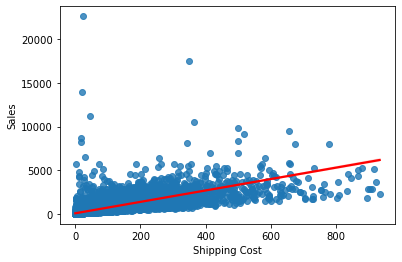

In [77]:
#A regression plot to find the correlation between shipping cost and sales
#To change the colour of the line or scater supply the argument (line or scatter _kws)={"color":"red"}
sns.regplot(x="Shipping Cost",y="Sales",data=super_df, line_kws={"color": "red"})
plt.show()

**Observation**

From above, there is a strong positive correlation. The pearson r is 0.7680728376889523

### Average shipping cost for each region

In [65]:
sm = super_df.groupby('Market')[['Shipping Cost']].mean().round(2)
sm

,Shipping Cost
Market,
APAC,35.19
Africa,19.22
Canada,19.29
EMEA,17.57
EU,30.94
LATAM,22.75
US,23.83


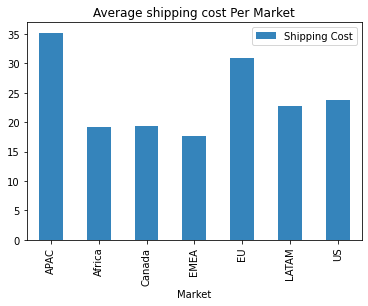

In [66]:
sm.plot(kind = 'bar', alpha = 0.9)
plt.title('Average shipping cost Per Market')
plt.show()

**Observations**

Market with the highest shipping cost is APAC with it average cost being 35.19 and 30.94 for Eu being the second highest. Even though cost of shipping on average does not affect sales, the delivery speed for EMEA,AFRICA and Canada needs to be reviewed to encourage sales from those markets.


In [95]:
# finding ship cost per region

sr = super_df.groupby('Region')[['Shipping Cost']].mean().round(2)
sr

,Shipping Cost
Region,
Africa,19.22
Canada,19.29
Caribbean,21.06
Central,26.71
Central Asia,38.00
EMEA,17.57
East,25.54
North,27.48
North Asia,40.65


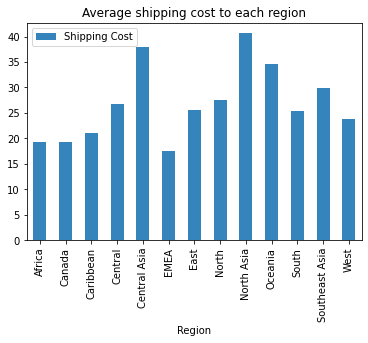

In [79]:
sr.plot(kind = 'bar', alpha = 0.9)
plt.title('Average shipping cost to each region')
plt.show()

###  Product categories to be targetted to the different markets

In [80]:
# sum of counts of categories for each market

super_df.groupby('Market')['Category'].count()

Market
APAC      11002
Africa     4587
Canada      384
EMEA       5029
EU        10000
LATAM     10294
US         9994
Name: Category, dtype: int64

In [93]:
# Finding the value counts of each category in each market

pc = super_df.groupby('Market')['Category'].value_counts()
pc

Market  Category       
APAC    Office Supplies    6177
        Furniture          2429
        Technology         2396
Africa  Office Supplies    3045
        Technology          911
        Furniture           631
Canada  Office Supplies     277
        Technology           65
        Furniture            42
EMEA    Office Supplies    3297
        Technology          962
        Furniture           770
EU      Office Supplies    6589
        Technology         1910
        Furniture          1501
LATAM   Office Supplies    5862
        Furniture          2382
        Technology         2050
US      Office Supplies    6026
        Furniture          2121
        Technology         1847
Name: Category, dtype: int64

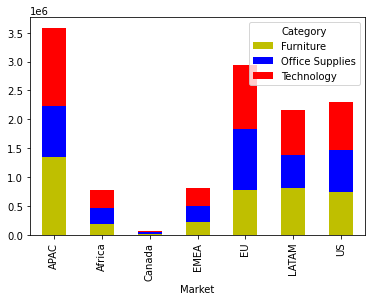

In [82]:
# visualising using a stacked bar for sales of categories per market
pc= pd.crosstab(super_df['Market'],super_df['Category'],values = super_df['Sales'],aggfunc =np.sum).round(2)
pc

pc.plot(kind= 'bar', stacked = True, color= ('y','b','r'))
plt.show()

### Monthly Profit Trend by market

In [83]:
months = super_df.groupby(['Order_Month','Market'],
                          as_index=False,
                          sort=True)[['Profit']].sum()
months


,Order_Month,Market,Profit
0,April,APAC,24766.15830
1,April,Africa,7855.42800
2,April,Canada,319.02000
3,April,EMEA,1864.35300
4,April,EU,27895.96950
...,...,...,...
79,September,Canada,800.34000
80,September,EMEA,-3162.28500
81,September,EU,31233.21600
82,September,LATAM,22736.23504


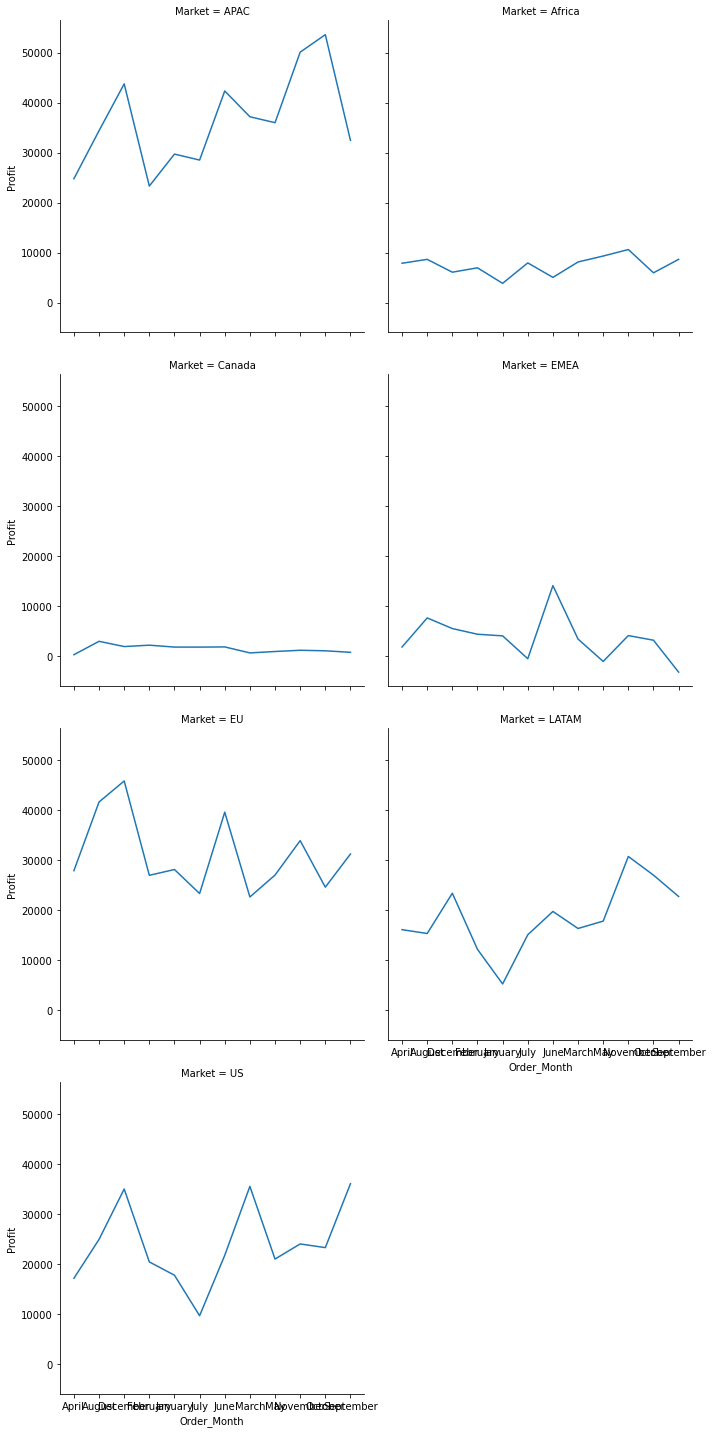

In [84]:
# line plot to depict the trend of Profit per Month of order
st = sns.relplot(x = 'Order_Month',y= 'Profit', data = months,
            kind= 'line',col = 'Market', col_wrap =2)

**OBSERVATIONS**

Sales from Africa looks promising except the downward slopes are as a result of discount sales. In this market,the most important focus should be on office supplies as well as driving sales with the other categories by running discounts sales in months with low spike in overall sales. 

The EMEA market performed the worse right after Canada. 
This market needs to identify and also upsell complimentary products of office supplies in the other categories. 
Since office supplies are the most patronized products, while upselling, discount priority needs to be given as well to drive sale and increase profit in the long run.

Canada market needs to also employ the cross-selling, upselling and discount approach to drive sales. 
Sales of all categories in this market is relatively low and hence they record less sales and profit. 

### Yearly Profit Trend by Market

In [85]:
years = super_df.groupby(['Order_Year','Market'],
                          as_index=False,
                          sort=False)[['Profit']].sum()
years


,Order_Year,Market,Profit
0,2011,Africa,10944.11400
1,2011,APAC,83031.57540
2,2011,EMEA,5280.03000
3,2011,EU,61625.62200
4,2011,US,49543.97410
5,2011,LATAM,36708.41604
6,2011,Canada,1807.08000
7,2012,APAC,89410.85040
8,2012,LATAM,50184.89800
9,2012,Africa,11908.93500


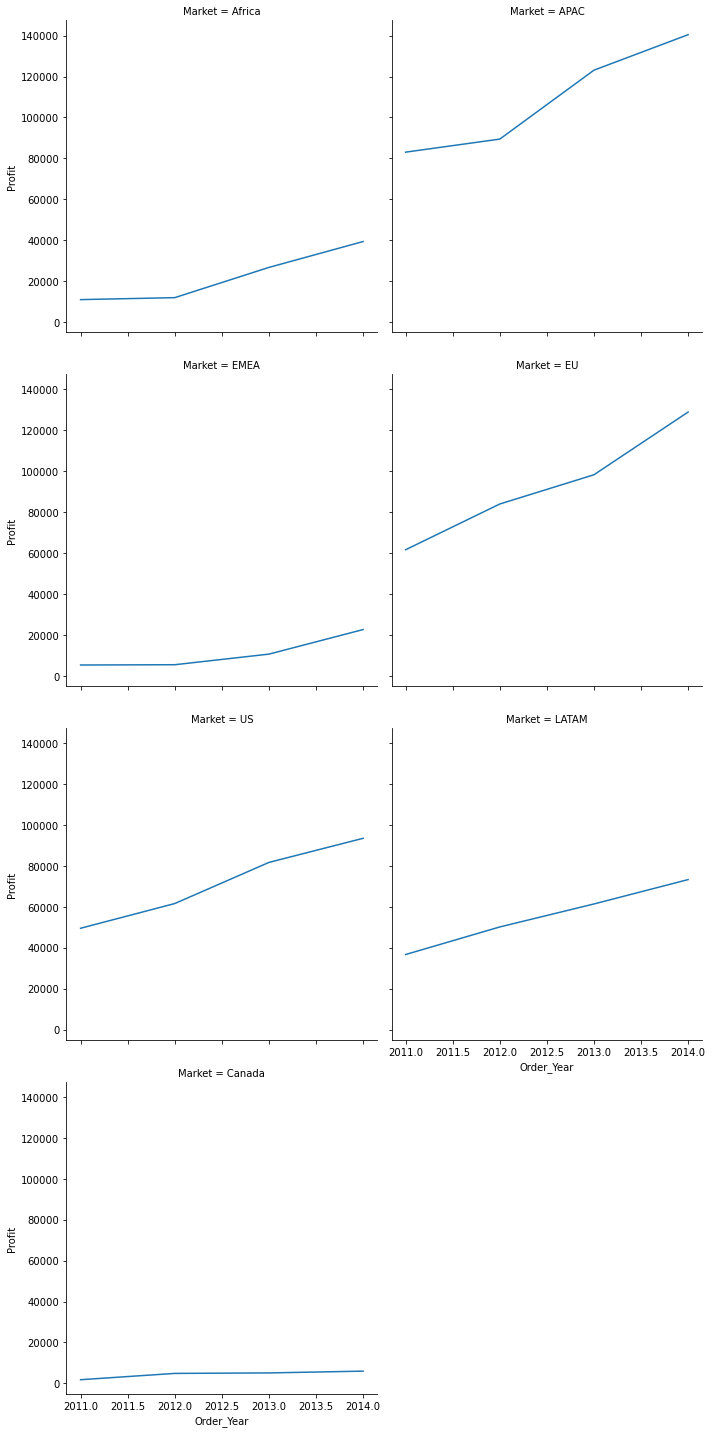

In [86]:
years = sns.relplot(x ='Order_Year',y= 'Profit', data = years,
            kind= 'line',col = 'Market',col_wrap =2)

### Shipping Trend per Market

In [88]:
shipping = super_df.groupby(['Ship_Month','Market'],
                          as_index=False,
                          sort=True)[['Market','Sales','Profit']].sum()


C:\Users\hp\AppData\Local\Temp/ipykernel_18372/574961097.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_labels,rotation=90)


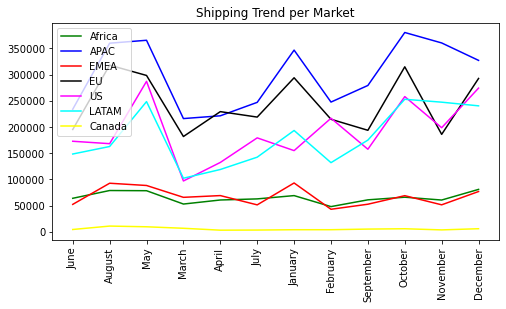

In [89]:

tick_labels = super_df['Ship_Month'].unique()

fig,ax = plt.subplots(figsize=(8,4))

ax.plot(shipping[shipping['Market']=='Africa']['Ship_Month'],
        shipping[shipping['Market']=='Africa']['Sales'],
        label='Africa',color='green')


ax.plot(shipping[shipping['Market']=='APAC']['Ship_Month'],
        shipping[shipping['Market']=='APAC']['Sales'],
        label='APAC',color='blue')


ax.plot(shipping[shipping['Market']=='EMEA']['Ship_Month'],
        shipping[shipping['Market']=='EMEA']['Sales'],
        label='EMEA',color='red')


ax.plot(shipping[shipping['Market']=='EU']['Ship_Month'],
        shipping[shipping['Market']=='EU']['Sales'],
        label ='EU',color='black') 

ax.plot(shipping[shipping['Market']=='US']['Ship_Month'],
        shipping[shipping['Market']=='US']['Sales'],
        label ='US',color='magenta') 

ax.plot(shipping[shipping['Market']=='LATAM']['Ship_Month'],
        shipping[shipping['Market']=='LATAM']['Sales'],
        label ='LATAM',color='cyan') 

ax.plot(shipping[shipping['Market']=='Canada']['Ship_Month'],
        shipping[shipping['Market']=='Canada']['Sales'],
        label ='Canada',color='yellow') 
ax.set_xticklabels(tick_labels,rotation=90)
ax.legend()
ax.set_title('Shipping Trend per Market')
plt.show()

**OBSERVATIONS** 

North Asia has the highest shipping cost on average with 40.65 and EMEA recording 17.57 as average. 


### Average shipping cost per Market

In [90]:
ship = super_df.groupby(['Ship_Month','Market'],
                          as_index=False,
                          sort=True)[['Shipping Cost']].mean()


C:\Users\hp\AppData\Local\Temp/ipykernel_18372/1789069028.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_labels,rotation=90)


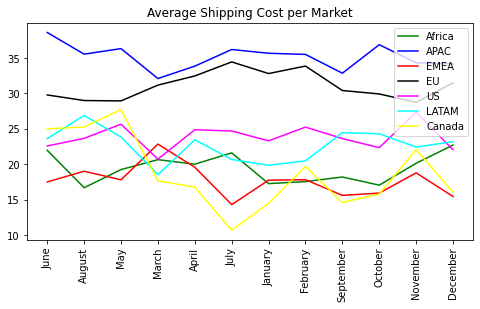

In [91]:
tick_labels = super_df['Ship_Month'].unique()

fig,ax = plt.subplots(figsize=(8,4))

ax.plot(ship[ship['Market']=='Africa']['Ship_Month'],
        ship[ship['Market']=='Africa']['Shipping Cost'],
        label='Africa',color='green')


ax.plot(ship[ship['Market']=='APAC']['Ship_Month'],
        ship[ship['Market']=='APAC']['Shipping Cost'],
        label='APAC',color='blue')


ax.plot(ship[ship['Market']=='EMEA']['Ship_Month'],
        ship[ship['Market']=='EMEA']['Shipping Cost'],
        label='EMEA',color='red')


ax.plot(ship[ship['Market']=='EU']['Ship_Month'],
        ship[ship['Market']=='EU']['Shipping Cost'],
        label ='EU',color='black') 

ax.plot(ship[ship['Market']=='US']['Ship_Month'],
        ship[ship['Market']=='US']['Shipping Cost'],
        label ='US',color='magenta') 

ax.plot(ship[ship['Market']=='LATAM']['Ship_Month'],
        ship[ship['Market']=='LATAM']['Shipping Cost'],
        label ='LATAM',color='cyan') 

ax.plot(ship[ship['Market']=='Canada']['Ship_Month'],
        ship[ship['Market']=='Canada']['Shipping Cost'],
        label ='Canada',color='yellow') 
ax.set_xticklabels(tick_labels,rotation=90)
ax.legend()
ax.set_title('Average Shipping Cost per Market')
plt.show()

### Conclusion

Generally with everything considered, The company needs to drive sales in the  EMEA, AFRICA and Canada markets.
Also, they need to develop the strategy of cross-selling to drive sales in the office supplies category and upsell in the technology and furniture categories in other to increase sales hence profit.
Prices of certain consumer products need to be revised in other to drive sales as well as certain item scrapped or stocked in smaller quantities as they incur losses and also are least patronized. Example; Tables, Envelopes, Fasteners etc.
